In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [2]:
data = pd.read_csv(r'C:\Users\rajar\OneDrive\Desktop\Excel Folder\Titanic dataset.csv')

In [3]:
data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [4]:
# EXPLORE the DATASET

In [5]:
data.shape
print('Rows:',data.shape[0])
print('Columns:',data.shape[1])

Rows: 891
Columns: 12


In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


Here it can be seen that there are missing values in Embarked, Cabin, Age

In [7]:
data.describe().T

,count,mean,std,min,25%,50%,75%,max
PassengerId,891.0,446.000000,257.353842,1.00,223.5000,446.0000,668.5,891.0000
Survived,891.0,0.383838,0.486592,0.00,0.0000,0.0000,1.0,1.0000
Pclass,891.0,2.308642,0.836071,1.00,2.0000,3.0000,3.0,3.0000
Age,714.0,29.699118,14.526497,0.42,20.1250,28.0000,38.0,80.0000
SibSp,891.0,0.523008,1.102743,0.00,0.0000,0.0000,1.0,8.0000
Parch,891.0,0.381594,0.806057,0.00,0.0000,0.0000,0.0,6.0000
Fare,891.0,32.204208,49.693429,0.00,7.9104,14.4542,31.0,512.3292


Here there are posibilites of outliers in Age and Fare column

In [8]:
data.describe(include=object).T

,count,unique,top,freq
Name,891,891,"Braund, Mr. Owen Harris",1
Sex,891,2,male,577
Ticket,891,681,347082,7
Cabin,204,147,B96 B98,4
Embarked,889,3,S,644


In [9]:
data.corr()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
PassengerId,1.000000,-0.005007,-0.035144,0.036847,-0.057527,-0.001652,0.012658
Survived,-0.005007,1.000000,-0.338481,-0.077221,-0.035322,0.081629,0.257307
Pclass,-0.035144,-0.338481,1.000000,-0.369226,0.083081,0.018443,-0.549500
Age,0.036847,-0.077221,-0.369226,1.000000,-0.308247,-0.189119,0.096067
SibSp,-0.057527,-0.035322,0.083081,-0.308247,1.000000,0.414838,0.159651
Parch,-0.001652,0.081629,0.018443,-0.189119,0.414838,1.000000,0.216225
Fare,0.012658,0.257307,-0.549500,0.096067,0.159651,0.216225,1.000000


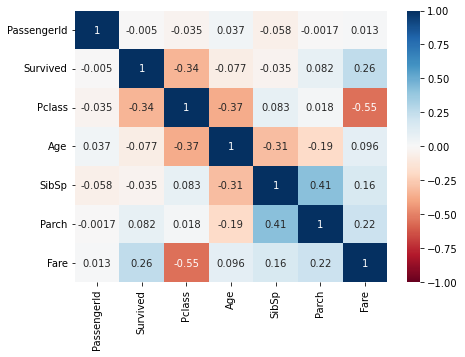

In [10]:
plt.figure(figsize=(7,5))
sns.heatmap(data.corr(),vmax=1,vmin=-1,cmap='RdBu',annot=True)
plt.show()

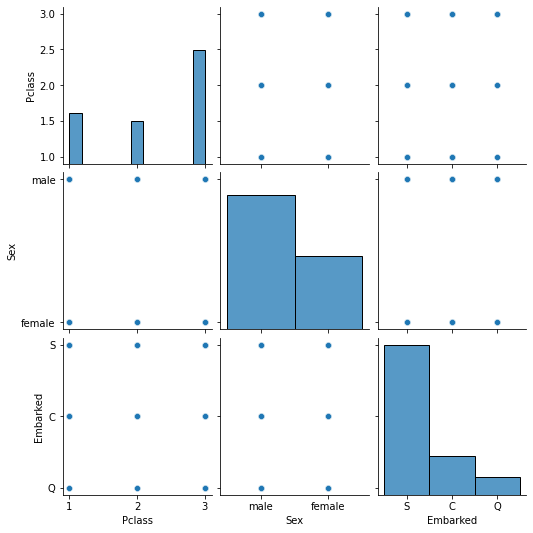

In [11]:
sns.pairplot(vars=['Pclass','Sex','Embarked'],data=data)
plt.show()

# Data Analysis on Survived

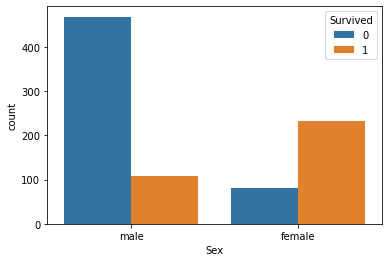

In [12]:
sns.countplot(data['Sex'], hue=data['Survived'])

plt.show()

In [13]:
data_sex = data.groupby(by=['Sex','Survived'])['Survived'].count()

In [14]:
print('Females Survived %.2f%%'%((data_sex['female'][1]/(data_sex['female'][0]+data_sex['female'][1])*100)))
print('Males Survived %.2f%%'%((data_sex['male'][1]/(data_sex['male'][0]+data_sex['male'][1])*100)))

Females Survived 74.20%
Males Survived 18.89%


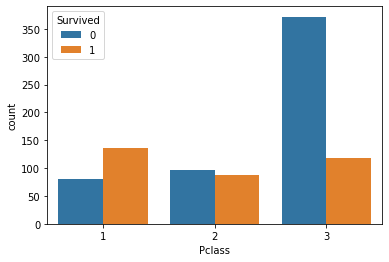

In [15]:
sns.countplot(data['Pclass'], hue=data['Survived'])

plt.show()

In [16]:
data_pclass = data.groupby(by=['Pclass','Survived'])['Survived'].count()

In [17]:
data_pclass

Pclass  Survived
1       0            80
        1           136
2       0            97
        1            87
3       0           372
        1           119
Name: Survived, dtype: int64

In [18]:
print('1st Class Survived %.2f%%'%((data_pclass[1][1]/(data_pclass[1][0]+data_pclass[1][1])*100)))
print('2nd Class Survived %.2f%%'%((data_pclass[2][1]/(data_pclass[2][0]+data_pclass[2][1])*100)))
print('3rd Class Survived %.2f%%'%((data_pclass[3][1]/(data_pclass[3][0]+data_pclass[3][1])*100)))

1st Class Survived 62.96%
2nd Class Survived 47.28%
3rd Class Survived 24.24%


In [19]:
def age_category(age):
    if age<=12:
        return 'Children'
    elif age>12 and age<=18:
        return 'Teenage'
    elif age>18 and age<=30:
        return 'Youth'
    elif age>30 and age<=45:
        return 'Midage'
    elif age>45 and age<60:
        return 'Oldage'
    else:
        return 'Seniors'

In [20]:
data['AgeCategory'] = data['Age'].apply(age_category)

In [21]:
data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,AgeCategory
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,Youth
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,Midage
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,Youth
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,Midage
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,Midage


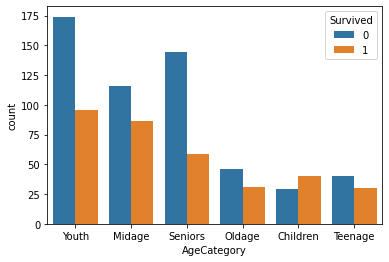

In [22]:
sns.countplot(data['AgeCategory'], hue=data['Survived'])
plt.show()

In [23]:
observed = pd.crosstab(data['AgeCategory'],data['Survived'])

In [24]:
# H0: The Survived is Independent of Age Category
# H1: The Survived  Depends upon the Age Category
from scipy.stats import chi2_contingency

chi,p,dof,expected = chi2_contingency(observed)
print('Chi sq: ',chi)
print('p-value: ',p)
if p<0.05:
    print('Accept The H1:')
else:
    print('Accept the H0:')

Chi sq:  21.76819364956196
p-value:  0.0005794728331556137
Accept The H1:


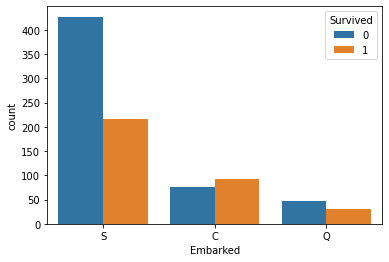

In [25]:
sns.countplot(data['Embarked'], hue=data['Survived'])
plt.show()

In [26]:
# Does the Survived Depends upon Fare Price??
fare_surv = data[data['Survived']==1]['Fare']
fare_nsurv = data[data['Survived']==0]['Fare']

In [27]:
from statsmodels.stats.weightstats import ztest

In [28]:
# H0: There is no difference in Fare of Surv and Fare of not Surv
# H1: The two samples are different

z_score,p_value = ztest(fare_surv,fare_nsurv)
print('z-score: ',z_score)
print('p-value: ',p_value)
if p_value<0.05:
    print('Accept The H1:')
else:
    print('Accept the H0:')

z-score:  7.939191660871055
p-value:  2.035031103573989e-15
Accept The H1:


# DATA PRE-PROCESSING

## Detect and Treat the missing Values

In [29]:
((data.isnull().sum()/data.isnull().count())*100).sort_values(ascending=False)

Cabin          77.104377
Age            19.865320
Embarked        0.224467
PassengerId     0.000000
Survived        0.000000
Pclass          0.000000
Name            0.000000
Sex             0.000000
SibSp           0.000000
Parch           0.000000
Ticket          0.000000
Fare            0.000000
AgeCategory     0.000000
dtype: float64

In [30]:
data[data['Embarked'].isnull()]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,AgeCategory
61,62,1,1,"Icard, Miss. Amelie",female,38.0,0,0,113572,80.0,B28,NaN,Midage
829,830,1,1,"Stone, Mrs. George Nelson (Martha Evelyn)",female,62.0,0,0,113572,80.0,B28,NaN,Seniors


In [31]:
data.groupby(by=['Pclass','Embarked'])['Fare'].median()[1]

Embarked
C    78.2667
Q    90.0000
S    52.0000
Name: Fare, dtype: float64

In [32]:
data['Embarked']= np.where(data['Embarked'].isnull(),'C',data['Embarked'])

In [33]:
data.iloc[[61,829],:]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,AgeCategory
61,62,1,1,"Icard, Miss. Amelie",female,38.0,0,0,113572,80.0,B28,C,Midage
829,830,1,1,"Stone, Mrs. George Nelson (Martha Evelyn)",female,62.0,0,0,113572,80.0,B28,C,Seniors


In [34]:
data[data['Embarked'].isnull()]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,AgeCategory


In [35]:
# treating Age for missing value
data[data['Age'].isnull()]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,AgeCategory
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q,Seniors
17,18,1,2,"Williams, Mr. Charles Eugene",male,NaN,0,0,244373,13.0000,NaN,S,Seniors
19,20,1,3,"Masselmani, Mrs. Fatima",female,NaN,0,0,2649,7.2250,NaN,C,Seniors
26,27,0,3,"Emir, Mr. Farred Chehab",male,NaN,0,0,2631,7.2250,NaN,C,Seniors
28,29,1,3,"O'Dwyer, Miss. Ellen ""Nellie""",female,NaN,0,0,330959,7.8792,NaN,Q,Seniors
...,...,...,...,...,...,...,...,...,...,...,...,...,...
859,860,0,3,"Razi, Mr. Raihed",male,NaN,0,0,2629,7.2292,NaN,C,Seniors
863,864,0,3,"Sage, Miss. Dorothy Edith ""Dolly""",female,NaN,8,2,CA. 2343,69.5500,NaN,S,Seniors
868,869,0,3,"van Melkebeke, Mr. Philemon",male,NaN,0,0,345777,9.5000,NaN,S,Seniors
878,879,0,3,"Laleff, Mr. Kristo",male,NaN,0,0,349217,7.8958,NaN,S,Seniors


In [36]:
data['Age'].median()

28.0

In [37]:
data['Age'].fillna(data['Age'].median(), inplace=True)

In [38]:
data[data['Age'].isnull()]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,AgeCategory


In [39]:
# We need to drop the cabin column beacuse 77% data is missing

In [40]:
data.drop(columns=['Cabin'], inplace=True)

In [41]:
((data.isnull().sum()/data.isnull().count())*100).sort_values(ascending=False)

PassengerId    0.0
Survived       0.0
Pclass         0.0
Name           0.0
Sex            0.0
Age            0.0
SibSp          0.0
Parch          0.0
Ticket         0.0
Fare           0.0
Embarked       0.0
AgeCategory    0.0
dtype: float64

## Detecting and treating the outliers

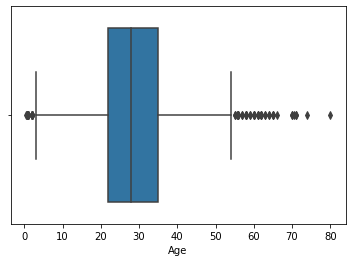

In [42]:
sns.boxplot(data['Age'])
plt.show()

In [43]:
data[data['Age']>70]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,AgeCategory
96,97,0,1,"Goldschmidt, Mr. George B",male,71.0,0,0,PC 17754,34.6542,C,Seniors
116,117,0,3,"Connors, Mr. Patrick",male,70.5,0,0,370369,7.7500,Q,Seniors
493,494,0,1,"Artagaveytia, Mr. Ramon",male,71.0,0,0,PC 17609,49.5042,C,Seniors
630,631,1,1,"Barkworth, Mr. Algernon Henry Wilson",male,80.0,0,0,27042,30.0000,S,Seniors
851,852,0,3,"Svensson, Mr. Johan",male,74.0,0,0,347060,7.7750,S,Seniors


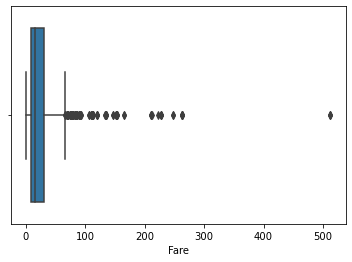

In [44]:
sns.boxplot(data['Fare'])
plt.show()

In [45]:
data[data['Fare']>500]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,AgeCategory
258,259,1,1,"Ward, Miss. Anna",female,35.0,0,0,PC 17755,512.3292,C,Midage
679,680,1,1,"Cardeza, Mr. Thomas Drake Martinez",male,36.0,0,1,PC 17755,512.3292,C,Midage
737,738,1,1,"Lesurer, Mr. Gustave J",male,35.0,0,0,PC 17755,512.3292,C,Midage


In [46]:
# We will cap the values in fare to 95th percentile value
np.percentile(data['Fare'],95)

112.07915

In [47]:
ul = np.percentile(data['Fare'],95)

In [48]:
data['Fare']= np.where(data['Fare']>ul,ul,data['Fare'])

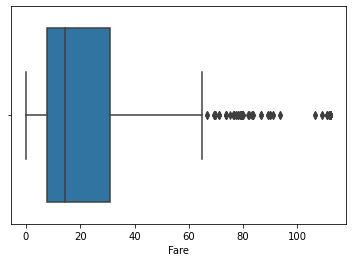

In [49]:
sns.boxplot(data['Fare'])
plt.show()

## Feature Selection

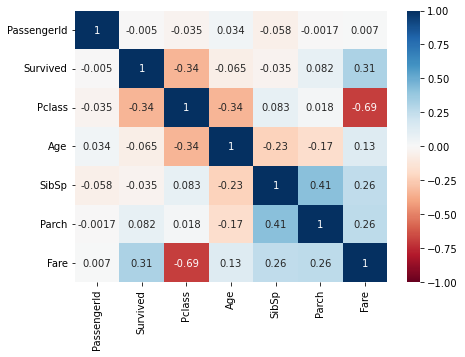

In [50]:
plt.figure(figsize=(7,5))
sns.heatmap(data.corr(),vmax=1,vmin=-1,cmap='RdBu',annot=True)
plt.show()

In [51]:
# To avoid multicolinearity we need to remove Pclass

In [52]:
data.drop(columns=['PassengerId','Pclass','Name','Ticket','AgeCategory'],inplace=True)

In [53]:
data.head()

,Survived,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,male,22.0,1,0,7.2500,S
1,1,female,38.0,1,0,71.2833,C
2,1,female,26.0,0,0,7.9250,S
3,1,female,35.0,1,0,53.1000,S
4,0,male,35.0,0,0,8.0500,S


## Feature Engineering

In [54]:
data = pd.get_dummies(data, drop_first=True)

In [55]:
data.head()

,Survived,Age,SibSp,Parch,Fare,Sex_male,Embarked_Q,Embarked_S
0,0,22.0,1,0,7.2500,1,0,1
1,1,38.0,1,0,71.2833,0,0,0
2,1,26.0,0,0,7.9250,0,0,1
3,1,35.0,1,0,53.1000,0,0,1
4,0,35.0,0,0,8.0500,1,0,1


## Feature Scaling

In [56]:
from sklearn.preprocessing import StandardScaler

In [57]:
sc = StandardScaler()

In [58]:
data_s = sc.fit_transform(data)

In [59]:
data_s

array([[-0.78927234, -0.56573646,  0.43279337, ...,  0.73769513,
        -0.30756234,  0.61930636],
       [ 1.2669898 ,  0.66386103,  0.43279337, ..., -1.35557354,
        -0.30756234, -1.61470971],
       [ 1.2669898 , -0.25833709, -0.4745452 , ..., -1.35557354,
        -0.30756234,  0.61930636],
       ...,
       [-0.78927234, -0.1046374 ,  0.43279337, ..., -1.35557354,
        -0.30756234,  0.61930636],
       [ 1.2669898 , -0.25833709, -0.4745452 , ...,  0.73769513,
        -0.30756234, -1.61470971],
       [-0.78927234,  0.20276197, -0.4745452 , ...,  0.73769513,
         3.25137334, -1.61470971]])

In [60]:
pd.DataFrame(data_s, columns=data.columns)

,Survived,Age,SibSp,Parch,Fare,Sex_male,Embarked_Q,Embarked_S
0,-0.789272,-0.565736,0.432793,-0.473674,-0.700836,0.737695,-0.307562,0.619306
1,1.266990,0.663861,0.432793,-0.473674,1.491434,-1.355574,-0.307562,-1.614710
2,1.266990,-0.258337,-0.474545,-0.473674,-0.677726,-1.355574,-0.307562,0.619306
3,1.266990,0.433312,0.432793,-0.473674,0.868903,-1.355574,-0.307562,0.619306
4,-0.789272,0.433312,-0.474545,-0.473674,-0.673447,0.737695,-0.307562,0.619306
...,...,...,...,...,...,...,...,...
886,-0.789272,-0.181487,-0.474545,-0.473674,-0.503976,0.737695,-0.307562,0.619306
887,1.266990,-0.796286,-0.474545,-0.473674,0.078042,-1.355574,-0.307562,0.619306
888,-0.789272,-0.104637,0.432793,2.008933,-0.146206,-1.355574,-0.307562,0.619306
889,1.266990,-0.258337,-0.474545,-0.473674,0.078042,0.737695,-0.307562,-1.614710


## Train Test Split

In [61]:
y =data['Survived']
x = data.drop(columns=['Survived'])

In [62]:
x

,Age,SibSp,Parch,Fare,Sex_male,Embarked_Q,Embarked_S
0,22.0,1,0,7.2500,1,0,1
1,38.0,1,0,71.2833,0,0,0
2,26.0,0,0,7.9250,0,0,1
3,35.0,1,0,53.1000,0,0,1
4,35.0,0,0,8.0500,1,0,1
...,...,...,...,...,...,...,...
886,27.0,0,0,13.0000,1,0,1
887,19.0,0,0,30.0000,0,0,1
888,28.0,1,2,23.4500,0,0,1
889,26.0,0,0,30.0000,1,0,0


In [63]:
y

0      0
1      1
2      1
3      1
4      0
      ..
886    0
887    1
888    0
889    1
890    0
Name: Survived, Length: 891, dtype: int64

In [64]:
from sklearn.model_selection import train_test_split

In [65]:
x_train,x_test, y_train,y_test = train_test_split(x,y,stratify=y,train_size=0.8,random_state=2)

In [66]:
print(x_train.shape,y_train.shape)
print(x_test.shape,y_test.shape)

(712, 7) (712,)
(179, 7) (179,)


## Logistic Regression Model

In [67]:
from sklearn.linear_model import LogisticRegression

In [68]:
model_lr = LogisticRegression()

In [69]:
model_lr.fit(x_train,y_train)

LogisticRegression()

In [70]:
# ln(y/1-y) = b0 + b1x1 + b2x2.......bnxn  [Sigmoid Function]
# Log loss function  j = -min(yi*log(p(y^))+(1-yi)log(p(1-y^)))

In [71]:
model_lr.coef_

array([[-0.02535741, -0.41570464, -0.23754026,  0.0279269 , -2.51459833,
        -0.31471231, -0.29738   ]])

In [72]:
model_lr.intercept_

array([1.57111452])

In [73]:
# Hard Predictions

In [74]:
y_pred = model_lr.predict(x_test)

In [75]:
pd.DataFrame({'Actual Y':y_test,'Predicted Y':y_pred}).head(20)

,Actual Y,Predicted Y
90,0,0
736,0,0
48,0,0
783,0,0
404,0,1
884,0,0
865,1,1
796,1,1
819,0,0
75,0,0


In [76]:
# Validation

In [77]:
from sklearn.metrics import confusion_matrix,accuracy_score,recall_score,precision_score,f1_score,log_loss

In [78]:
def validation(test,pred):
    print('Confusion Matrix:\n',confusion_matrix(test,pred))
    print('Acuuracy:',accuracy_score(test,pred))
    print('Recall:',recall_score(test,pred))
    print('Precision:',precision_score(test,pred))
    print('F1 Score:',f1_score(test,pred))

In [79]:
validation(y_test,y_pred)

Confusion Matrix:
 [[94 16]
 [22 47]]
Acuuracy: 0.7877094972067039
Recall: 0.6811594202898551
Precision: 0.746031746031746
F1 Score: 0.7121212121212122


In [80]:
# ROC Curve

In [81]:
# Soft predictions

In [82]:
y_pred_soft = model_lr.predict_proba(x_test)

In [83]:
y_pred_soft[:,1]

array([0.14786854, 0.47208917, 0.13245002, 0.10094479, 0.7327271 ,
       0.15737183, 0.63917218, 0.68034191, 0.08035954, 0.15960657,
       0.14782407, 0.69858674, 0.08673938, 0.14729097, 0.74094274,
       0.86259676, 0.16266431, 0.18762695, 0.14470186, 0.15344911,
       0.1564847 , 0.14118669, 0.13812154, 0.6269415 , 0.94736324,
       0.47334297, 0.0763595 , 0.66935522, 0.73713563, 0.10116857,
       0.14471449, 0.72920688, 0.34626121, 0.64511744, 0.1170312 ,
       0.70030787, 0.38545584, 0.6304626 , 0.14503175, 0.13872557,
       0.18973708, 0.71916632, 0.09367689, 0.57144463, 0.77305057,
       0.63423668, 0.21423655, 0.20398743, 0.06827642, 0.69669357,
       0.1581139 , 0.12516569, 0.39059567, 0.08967103, 0.68659154,
       0.81384061, 0.92300835, 0.17329333, 0.16850543, 0.07169363,
       0.20845764, 0.24851991, 0.71443091, 0.21521555, 0.72818613,
       0.85011003, 0.22291783, 0.14066086, 0.71219134, 0.05214464,
       0.83297101, 0.18975511, 0.93146596, 0.19318428, 0.66643

In [84]:
pd.DataFrame({'Actual Y':y_test,'Predicted Y':y_pred,'Pred Y Soft':y_pred_soft[:,1]}).head(20)

,Actual Y,Predicted Y,Pred Y Soft
90,0,0,0.147869
736,0,0,0.472089
48,0,0,0.132450
783,0,0,0.100945
404,0,1,0.732727
884,0,0,0.157372
865,1,1,0.639172
796,1,1,0.680342
819,0,0,0.080360
75,0,0,0.159607


In [85]:
# Log loss function  j = -min(yi*log(p(y^))+(1-yi)log(p(1-y^)))
log_loss(y_test,y_pred_soft[:,1])

0.4751480755512017

In [86]:
from sklearn.metrics import roc_auc_score,roc_curve

In [87]:
fpr,tpr,thres = roc_curve(y_test,y_pred_soft[:,1])

Area Under the Curve:  0.8270750988142292


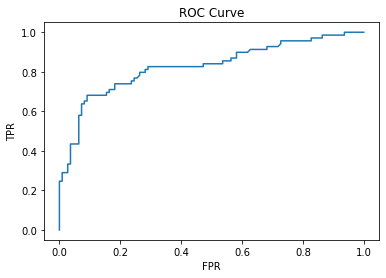

In [88]:
plt.plot(fpr,tpr)
plt.xlabel('FPR')
plt.ylabel('TPR')
plt.title('ROC Curve')
print('Area Under the Curve: ',roc_auc_score(y_test,y_pred_soft[:,1]))
plt.show()

In [89]:
# Changing the threshold or classifier cutoff

In [90]:
threshold = 0.45
y_pred_new = (y_pred_soft[:,1]>=threshold).astype(int)

In [91]:
y_pred_new

array([0, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0,
       0, 1, 1, 1, 0, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1,
       1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 1, 0, 1, 1,
       0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0,
       0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0,
       0, 0, 0, 1, 1, 0, 1, 1, 1, 1, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 1, 0,
       0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0,
       0, 0, 0])

In [92]:
validation(y_test,y_pred_new)

Confusion Matrix:
 [[92 18]
 [20 49]]
Acuuracy: 0.7877094972067039
Recall: 0.7101449275362319
Precision: 0.7313432835820896
F1 Score: 0.7205882352941175


## Overfitting

In [93]:
y_pred_train = model_lr.predict(x_train)

In [94]:
validation(y_train,y_pred_train)

Confusion Matrix:
 [[374  65]
 [ 85 188]]
Acuuracy: 0.7893258426966292
Recall: 0.6886446886446886
Precision: 0.7430830039525692
F1 Score: 0.714828897338403


In [95]:
validation(y_test,y_pred)

Confusion Matrix:
 [[94 16]
 [22 47]]
Acuuracy: 0.7877094972067039
Recall: 0.6811594202898551
Precision: 0.746031746031746
F1 Score: 0.7121212121212122


## Regularization

### Ridge and Lasso

In [96]:
from sklearn.model_selection import GridSearchCV

In [97]:
params ={'C':[0.001,0.01,0.1,1,10,100,500]}

In [98]:
gscv = GridSearchCV(estimator=LogisticRegression(penalty='l2'),
                   param_grid=params,
                   scoring='accuracy',
                   verbose=3)

In [99]:
gscv.fit(x_train,y_train)

Fitting 5 folds for each of 7 candidates, totalling 35 fits
[CV 1/5] END ...........................C=0.001;, score=0.671 total time=   0.0s
[CV 2/5] END ...........................C=0.001;, score=0.664 total time=   0.0s
[CV 3/5] END ...........................C=0.001;, score=0.669 total time=   0.0s
[CV 4/5] END ...........................C=0.001;, score=0.718 total time=   0.0s
[CV 5/5] END ...........................C=0.001;, score=0.711 total time=   0.0s
[CV 1/5] END ............................C=0.01;, score=0.713 total time=   0.0s
[CV 2/5] END ............................C=0.01;, score=0.713 total time=   0.0s
[CV 3/5] END ............................C=0.01;, score=0.704 total time=   0.0s
[CV 4/5] END ............................C=0.01;, score=0.725 total time=   0.0s
[CV 5/5] END ............................C=0.01;, score=0.754 total time=   0.0s
[CV 1/5] END .............................C=0.1;, score=0.804 total time=   0.0s
[CV 2/5] END .............................C=0.1;,

GridSearchCV(estimator=LogisticRegression(),
             param_grid={'C': [0.001, 0.01, 0.1, 1, 10, 100, 500]},
             scoring='accuracy', verbose=3)

In [100]:
gscv.best_score_

0.7892642568698907

In [101]:
gscv.best_params_  # C=1/alpha

{'C': 0.1}

In [102]:
gscv = GridSearchCV(estimator=LogisticRegression(penalty='l1',solver='liblinear'),
                   param_grid=params,
                   scoring='accuracy',
                   verbose=3)

In [103]:
gscv.fit(x_train,y_train)

Fitting 5 folds for each of 7 candidates, totalling 35 fits
[CV 1/5] END ...........................C=0.001;, score=0.671 total time=   0.0s
[CV 2/5] END ...........................C=0.001;, score=0.650 total time=   0.0s
[CV 3/5] END ...........................C=0.001;, score=0.648 total time=   0.0s
[CV 4/5] END ...........................C=0.001;, score=0.711 total time=   0.0s
[CV 5/5] END ...........................C=0.001;, score=0.662 total time=   0.0s
[CV 1/5] END ............................C=0.01;, score=0.678 total time=   0.0s
[CV 2/5] END ............................C=0.01;, score=0.664 total time=   0.0s
[CV 3/5] END ............................C=0.01;, score=0.648 total time=   0.0s
[CV 4/5] END ............................C=0.01;, score=0.718 total time=   0.0s
[CV 5/5] END ............................C=0.01;, score=0.697 total time=   0.0s
[CV 1/5] END .............................C=0.1;, score=0.790 total time=   0.0s
[CV 2/5] END .............................C=0.1;,

GridSearchCV(estimator=LogisticRegression(penalty='l1', solver='liblinear'),
             param_grid={'C': [0.001, 0.01, 0.1, 1, 10, 100, 500]},
             scoring='accuracy', verbose=3)

In [104]:
gscv.best_score_

0.7850980005909582

In [105]:
gscv.best_params_

{'C': 0.1}

## Naive Bayes

In [106]:
from sklearn.naive_bayes import GaussianNB

In [107]:
model_nb = GaussianNB()

In [108]:
model_nb.fit(x_train,y_train)

GaussianNB()

In [109]:
y_pred_nb = model_nb.predict(x_test)

In [110]:
y_pred_nb

array([0, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0,
       0, 1, 1, 1, 0, 1, 1, 0, 0, 1, 0, 1, 0, 1, 1, 1, 0, 0, 0, 1, 0, 1,
       1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 1, 0, 1, 1,
       0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0,
       0, 1, 0, 0, 0, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0,
       0, 0, 0, 1, 1, 0, 1, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 1, 0,
       0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0,
       0, 0, 0], dtype=int64)

In [111]:
pd.DataFrame({'Actual Y':y_test,'Pred LR':y_pred,'Pred NB':y_pred_nb}).head(20)

,Actual Y,Pred LR,Pred NB
90,0,0,0
736,0,0,1
48,0,0,0
783,0,0,0
404,0,1,1
884,0,0,0
865,1,1,1
796,1,1,1
819,0,0,0
75,0,0,0


In [112]:
validation(y_test,y_pred_nb)

Confusion Matrix:
 [[94 16]
 [21 48]]
Acuuracy: 0.7932960893854749
Recall: 0.6956521739130435
Precision: 0.75
F1 Score: 0.7218045112781954


In [113]:
validation(y_test,y_pred)

Confusion Matrix:
 [[94 16]
 [22 47]]
Acuuracy: 0.7877094972067039
Recall: 0.6811594202898551
Precision: 0.746031746031746
F1 Score: 0.7121212121212122


In [114]:
# Soft Predictions

y_pred_nb_soft = model_nb.predict_proba(x_test)

In [115]:
y_pred_nb_soft[:,1]

array([7.67750443e-02, 8.29179171e-01, 6.51321842e-02, 1.01817889e-01,
       8.02055747e-01, 8.06933511e-02, 7.72249903e-01, 8.12629627e-01,
       4.14768181e-03, 8.07173301e-02, 1.89605136e-01, 9.06965181e-01,
       8.78187028e-02, 1.79994810e-01, 8.61716865e-01, 9.81436798e-01,
       7.75060538e-02, 9.18944034e-02, 7.60154087e-02, 7.85475544e-02,
       1.58387229e-01, 8.14353311e-02, 7.47489113e-02, 7.95935763e-01,
       9.93686930e-01, 8.08837952e-01, 2.10960310e-01, 8.39609056e-01,
       9.04723854e-01, 8.05479311e-02, 1.89538681e-01, 7.95913761e-01,
       1.77852271e-01, 7.78608810e-01, 1.14070049e-01, 8.03684886e-01,
       7.01989475e-01, 8.27401493e-01, 1.89538929e-01, 2.52481303e-01,
       1.89913076e-01, 9.16772972e-01, 1.04723728e-01, 9.22213287e-01,
       9.91530680e-01, 9.35993586e-01, 2.05170494e-01, 9.07934545e-02,
       9.53629718e-02, 7.78208889e-01, 8.06978752e-02, 7.32179146e-02,
       4.79562349e-01, 7.92155114e-02, 7.79055666e-01, 9.24760101e-01,
      

In [116]:
fpr_nb,tpr_nb,thres_nb = roc_curve(y_test,y_pred_nb_soft[:,1])

Area Under the Curve LR:  0.8270750988142292
Area Under the Curve NB:  0.8199604743083004


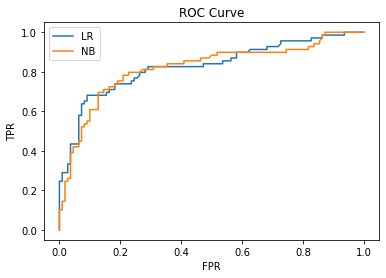

In [117]:
plt.plot(fpr,tpr)
plt.plot(fpr_nb,tpr_nb)
plt.xlabel('FPR')
plt.ylabel('TPR')
plt.title('ROC Curve')
plt.legend(['LR','NB'])
print('Area Under the Curve LR: ',roc_auc_score(y_test,y_pred_soft[:,1]))
print('Area Under the Curve NB: ',roc_auc_score(y_test,y_pred_nb_soft[:,1]))
plt.show()

In [118]:
from sklearn.tree import DecisionTreeClassifier

In [119]:
Dt_Model = DecisionTreeClassifier()

In [120]:
param = {'cretation':['gini','entropy'],'max_dept':[4.5,6,7,8]}

In [121]:
gscv = GridSearchCV(estimator=Dt_Model,param_grid=param,scoring='accurary',verbose=3)

In [122]:
gscv,param

(GridSearchCV(estimator=DecisionTreeClassifier(),
              param_grid={'cretation': ['gini', 'entropy'],
                          'max_dept': [4.5, 6, 7, 8]},
              scoring='accurary', verbose=3),
 {'cretation': ['gini', 'entropy'], 'max_dept': [4.5, 6, 7, 8]})

In [123]:
from sklearn import tree

In [124]:
# plt.figure(figsize=(10,8),dpi=200)
# tree.plot_tree(Dt_Model,feature_name=x_train.columns,fontsize=12)
# plt.show()

In [125]:
from sklearn.ensemble import RandomForestClassifier
rnf_model = RandomForestClassifier()

In [126]:
param = {'n_estimators': [50,100,200,500],'criterion':['gini','entropy'],'max_depth':[2,3,4,5]  }

In [127]:
gscv = GridSearchCV(estimator= rnf_model,param_grid = param,cv=3,scoring='accuracy',verbose=3)

In [128]:
gscv.fit(x_train,y_train)

Fitting 3 folds for each of 32 candidates, totalling 96 fits
[CV 1/3] END criterion=gini, max_depth=2, n_estimators=50;, score=0.782 total time=   0.0s
[CV 2/3] END criterion=gini, max_depth=2, n_estimators=50;, score=0.776 total time=   0.0s
[CV 3/3] END criterion=gini, max_depth=2, n_estimators=50;, score=0.785 total time=   0.0s
[CV 1/3] END criterion=gini, max_depth=2, n_estimators=100;, score=0.803 total time=   0.0s
[CV 2/3] END criterion=gini, max_depth=2, n_estimators=100;, score=0.751 total time=   0.1s
[CV 3/3] END criterion=gini, max_depth=2, n_estimators=100;, score=0.781 total time=   0.1s
[CV 1/3] END criterion=gini, max_depth=2, n_estimators=200;, score=0.794 total time=   0.2s
[CV 2/3] END criterion=gini, max_depth=2, n_estimators=200;, score=0.755 total time=   0.2s
[CV 3/3] END criterion=gini, max_depth=2, n_estimators=200;, score=0.776 total time=   0.2s
[CV 1/3] END criterion=gini, max_depth=2, n_estimators=500;, score=0.794 total time=   0.6s
[CV 2/3] END criterion

[CV 2/3] END criterion=entropy, max_depth=5, n_estimators=100;, score=0.793 total time=   0.0s
[CV 3/3] END criterion=entropy, max_depth=5, n_estimators=100;, score=0.797 total time=   0.0s
[CV 1/3] END criterion=entropy, max_depth=5, n_estimators=200;, score=0.811 total time=   0.2s
[CV 2/3] END criterion=entropy, max_depth=5, n_estimators=200;, score=0.802 total time=   0.2s
[CV 3/3] END criterion=entropy, max_depth=5, n_estimators=200;, score=0.793 total time=   0.2s
[CV 1/3] END criterion=entropy, max_depth=5, n_estimators=500;, score=0.819 total time=   0.7s
[CV 2/3] END criterion=entropy, max_depth=5, n_estimators=500;, score=0.797 total time=   0.5s
[CV 3/3] END criterion=entropy, max_depth=5, n_estimators=500;, score=0.797 total time=   0.5s


GridSearchCV(cv=3, estimator=RandomForestClassifier(),
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [2, 3, 4, 5],
                         'n_estimators': [50, 100, 200, 500]},
             scoring='accuracy', verbose=3)

In [129]:
gscv.score(x_train,y_train)

0.824438202247191

In [130]:
gscv.best_score_

0.8103747828245221

In [131]:
gscv.best_params_

{'criterion': 'entropy', 'max_depth': 4, 'n_estimators': 200}

In [132]:
rnf_model = RandomForestClassifier(**gscv.best_params_)

In [133]:
rnf_model.fit(x_train,y_train)

RandomForestClassifier(criterion='entropy', max_depth=4, n_estimators=200)

In [134]:
y_pred_rf = rnf_model.predict(x_test)

In [135]:
validation(y_test,y_pred_rf)

Confusion Matrix:
 [[95 15]
 [19 50]]
Acuuracy: 0.8100558659217877
Recall: 0.7246376811594203
Precision: 0.7692307692307693
F1 Score: 0.7462686567164178


In [136]:
rnf_model.score(x_test,y_test)

0.8100558659217877

# Boosting ADA

In [137]:
from sklearn.ensemble import AdaBoostClassifier
ada_model = AdaBoostClassifier()

In [138]:
param = {'n_estimators':[50,100,200,350,500],'learning_rate':[0.001,0.01,0.1,1,10]}

In [139]:
from sklearn.ensemble import GradientBoostingClassifier
model_gb = GradientBoostingClassifier()

In [143]:
param =  {'n_estimators': [50,100,200,500],'learning_rate':[0.001,0.01,0.1,1,10],'max_features':[3,4,5]  }

In [146]:
gscv = GridSearchCV(estimator=model_gb,param_grid=param,cv=3,scoring='accuracy',verbose=3)

In [147]:
gscv.fit(x_train,y_train)

Fitting 3 folds for each of 80 candidates, totalling 240 fits
[CV 1/3] END learning_rate=0.001, max_features=2, n_estimators=50;, score=0.618 total time=   0.0s
[CV 2/3] END learning_rate=0.001, max_features=2, n_estimators=50;, score=0.616 total time=   0.0s
[CV 3/3] END learning_rate=0.001, max_features=2, n_estimators=50;, score=0.616 total time=   0.0s
[CV 1/3] END learning_rate=0.001, max_features=2, n_estimators=100;, score=0.618 total time=   0.0s
[CV 2/3] END learning_rate=0.001, max_features=2, n_estimators=100;, score=0.616 total time=   0.0s
[CV 3/3] END learning_rate=0.001, max_features=2, n_estimators=100;, score=0.616 total time=   0.0s
[CV 1/3] END learning_rate=0.001, max_features=2, n_estimators=200;, score=0.618 total time=   0.0s
[CV 2/3] END learning_rate=0.001, max_features=2, n_estimators=200;, score=0.616 total time=   0.0s
[CV 3/3] END learning_rate=0.001, max_features=2, n_estimators=200;, score=0.616 total time=   0.0s
[CV 1/3] END learning_rate=0.001, max_fea

[CV 2/3] END learning_rate=0.01, max_features=4, n_estimators=500;, score=0.785 total time=   0.2s
[CV 3/3] END learning_rate=0.01, max_features=4, n_estimators=500;, score=0.810 total time=   0.2s
[CV 1/3] END learning_rate=0.01, max_features=5, n_estimators=50;, score=0.815 total time=   0.0s
[CV 2/3] END learning_rate=0.01, max_features=5, n_estimators=50;, score=0.738 total time=   0.0s
[CV 3/3] END learning_rate=0.01, max_features=5, n_estimators=50;, score=0.768 total time=   0.0s
[CV 1/3] END learning_rate=0.01, max_features=5, n_estimators=100;, score=0.819 total time=   0.0s
[CV 2/3] END learning_rate=0.01, max_features=5, n_estimators=100;, score=0.785 total time=   0.0s
[CV 3/3] END learning_rate=0.01, max_features=5, n_estimators=100;, score=0.789 total time=   0.0s
[CV 1/3] END learning_rate=0.01, max_features=5, n_estimators=200;, score=0.824 total time=   0.0s
[CV 2/3] END learning_rate=0.01, max_features=5, n_estimators=200;, score=0.789 total time=   0.1s
[CV 3/3] END 

[CV 3/3] END learning_rate=1, max_features=3, n_estimators=500;, score=0.781 total time=   0.2s
[CV 1/3] END learning_rate=1, max_features=4, n_estimators=50;, score=0.819 total time=   0.0s
[CV 2/3] END learning_rate=1, max_features=4, n_estimators=50;, score=0.785 total time=   0.0s
[CV 3/3] END learning_rate=1, max_features=4, n_estimators=50;, score=0.747 total time=   0.0s
[CV 1/3] END learning_rate=1, max_features=4, n_estimators=100;, score=0.798 total time=   0.0s
[CV 2/3] END learning_rate=1, max_features=4, n_estimators=100;, score=0.797 total time=   0.0s
[CV 3/3] END learning_rate=1, max_features=4, n_estimators=100;, score=0.764 total time=   0.0s
[CV 1/3] END learning_rate=1, max_features=4, n_estimators=200;, score=0.803 total time=   0.0s
[CV 2/3] END learning_rate=1, max_features=4, n_estimators=200;, score=0.764 total time=   0.0s
[CV 3/3] END learning_rate=1, max_features=4, n_estimators=200;, score=0.781 total time=   0.0s
[CV 1/3] END learning_rate=1, max_features=

GridSearchCV(cv=3, estimator=GradientBoostingClassifier(),
             param_grid={'learning_rate': [0.001, 0.01, 0.1, 1, 10],
                         'max_features': [2, 3, 4, 5],
                         'n_estimators': [50, 100, 200, 500]},
             scoring='accuracy', verbose=3)

In [148]:
y_pred_gb = gscv.predict(x_test)

In [149]:
validation(y_test,y_pred_gb)

Confusion Matrix:
 [[98 12]
 [20 49]]
Acuuracy: 0.8212290502793296
Recall: 0.7101449275362319
Precision: 0.8032786885245902
F1 Score: 0.7538461538461538


# XGBoosting

In [150]:
from xgboost import XGBClassifier
model_xgb = XGBClassifier()

In [151]:
param =  {'n_estimators': [50,100,200,350,500],'learning_rate':[0.001,0.01,0.1,1,10],'max_depth':[4,3,4,5]  }
gscv = GridSearchCV(estimator=model_xgb,param_grid=param,cv=3,scoring='accuracy',verbose=3)

In [152]:
gscv.fit(x_train,y_train)

Fitting 3 folds for each of 100 candidates, totalling 300 fits
[CV 1/3] END learning_rate=0.001, max_depth=4, n_estimators=50;, score=0.819 total time=   0.0s
[CV 2/3] END learning_rate=0.001, max_depth=4, n_estimators=50;, score=0.797 total time=   0.0s
[CV 3/3] END learning_rate=0.001, max_depth=4, n_estimators=50;, score=0.776 total time=   0.0s
[CV 1/3] END learning_rate=0.001, max_depth=4, n_estimators=100;, score=0.819 total time=   0.0s
[CV 2/3] END learning_rate=0.001, max_depth=4, n_estimators=100;, score=0.797 total time=   0.0s
[CV 3/3] END learning_rate=0.001, max_depth=4, n_estimators=100;, score=0.776 total time=   0.0s
[CV 1/3] END learning_rate=0.001, max_depth=4, n_estimators=200;, score=0.819 total time=   0.1s
[CV 2/3] END learning_rate=0.001, max_depth=4, n_estimators=200;, score=0.797 total time=   0.0s
[CV 3/3] END learning_rate=0.001, max_depth=4, n_estimators=200;, score=0.781 total time=   0.1s
[CV 1/3] END learning_rate=0.001, max_depth=4, n_estimators=350;, s

[CV 2/3] END learning_rate=0.01, max_depth=3, n_estimators=350;, score=0.785 total time=   0.1s
[CV 3/3] END learning_rate=0.01, max_depth=3, n_estimators=350;, score=0.802 total time=   0.1s
[CV 1/3] END learning_rate=0.01, max_depth=3, n_estimators=500;, score=0.828 total time=   0.3s
[CV 2/3] END learning_rate=0.01, max_depth=3, n_estimators=500;, score=0.776 total time=   0.3s
[CV 3/3] END learning_rate=0.01, max_depth=3, n_estimators=500;, score=0.789 total time=   0.3s
[CV 1/3] END learning_rate=0.01, max_depth=4, n_estimators=50;, score=0.815 total time=   0.0s
[CV 2/3] END learning_rate=0.01, max_depth=4, n_estimators=50;, score=0.793 total time=   0.0s
[CV 3/3] END learning_rate=0.01, max_depth=4, n_estimators=50;, score=0.789 total time=   0.0s
[CV 1/3] END learning_rate=0.01, max_depth=4, n_estimators=100;, score=0.815 total time=   0.0s
[CV 2/3] END learning_rate=0.01, max_depth=4, n_estimators=100;, score=0.793 total time=   0.0s
[CV 3/3] END learning_rate=0.01, max_depth=

[CV 3/3] END learning_rate=0.1, max_depth=5, n_estimators=200;, score=0.764 total time=   0.1s
[CV 1/3] END learning_rate=0.1, max_depth=5, n_estimators=350;, score=0.807 total time=   0.2s
[CV 2/3] END learning_rate=0.1, max_depth=5, n_estimators=350;, score=0.785 total time=   0.2s
[CV 3/3] END learning_rate=0.1, max_depth=5, n_estimators=350;, score=0.768 total time=   0.2s
[CV 1/3] END learning_rate=0.1, max_depth=5, n_estimators=500;, score=0.798 total time=   0.3s
[CV 2/3] END learning_rate=0.1, max_depth=5, n_estimators=500;, score=0.785 total time=   0.3s
[CV 3/3] END learning_rate=0.1, max_depth=5, n_estimators=500;, score=0.743 total time=   0.3s
[CV 1/3] END learning_rate=1, max_depth=4, n_estimators=50;, score=0.807 total time=   0.0s
[CV 2/3] END learning_rate=1, max_depth=4, n_estimators=50;, score=0.806 total time=   0.0s
[CV 3/3] END learning_rate=1, max_depth=4, n_estimators=50;, score=0.776 total time=   0.0s
[CV 1/3] END learning_rate=1, max_depth=4, n_estimators=100

[CV 1/3] END learning_rate=10, max_depth=3, n_estimators=200;, score=0.824 total time=   0.0s
[CV 2/3] END learning_rate=10, max_depth=3, n_estimators=200;, score=0.781 total time=   0.0s
[CV 3/3] END learning_rate=10, max_depth=3, n_estimators=200;, score=0.384 total time=   0.0s
[CV 1/3] END learning_rate=10, max_depth=3, n_estimators=350;, score=0.824 total time=   0.1s
[CV 2/3] END learning_rate=10, max_depth=3, n_estimators=350;, score=0.781 total time=   0.1s
[CV 3/3] END learning_rate=10, max_depth=3, n_estimators=350;, score=0.384 total time=   0.1s
[CV 1/3] END learning_rate=10, max_depth=3, n_estimators=500;, score=0.824 total time=   0.2s
[CV 2/3] END learning_rate=10, max_depth=3, n_estimators=500;, score=0.781 total time=   0.2s
[CV 3/3] END learning_rate=10, max_depth=3, n_estimators=500;, score=0.384 total time=   0.2s
[CV 1/3] END learning_rate=10, max_depth=4, n_estimators=50;, score=0.639 total time=   0.0s
[CV 2/3] END learning_rate=10, max_depth=4, n_estimators=50;,

GridSearchCV(cv=3,
             estimator=XGBClassifier(base_score=None, booster=None,
                                     callbacks=None, colsample_bylevel=None,
                                     colsample_bynode=None,
                                     colsample_bytree=None,
                                     early_stopping_rounds=None,
                                     enable_categorical=False, eval_metric=None,
                                     gamma=None, gpu_id=None, grow_policy=None,
                                     importance_type=None,
                                     interaction_constraints=None,
                                     learning_rate=None, max_bin=None,
                                     max_ca...
                                     max_delta_step=None, max_depth=None,
                                     max_leaves=None, min_child_weight=None,
                                     missing=nan, monotone_constraints=None,
                  

In [153]:
model_xgb.fit(x_train,y_train)

XGBClassifier(base_score=0.5, booster='gbtree', callbacks=None,
              colsample_bylevel=1, colsample_bynode=1, colsample_bytree=1,
              early_stopping_rounds=None, enable_categorical=False,
              eval_metric=None, gamma=0, gpu_id=-1, grow_policy='depthwise',
              importance_type=None, interaction_constraints='',
              learning_rate=0.300000012, max_bin=256, max_cat_to_onehot=4,
              max_delta_step=0, max_depth=6, max_leaves=0, min_child_weight=1,
              missing=nan, monotone_constraints='()', n_estimators=100,
              n_jobs=0, num_parallel_tree=1, predictor='auto', random_state=0,
              reg_alpha=0, reg_lambda=1, ...)

In [ ]:
y_pred_xg = model_xgb.predict(x_test)

In [ ]:
validation(y_test,y_pred_xg)

In [154]:
gscv.best_score_

0.8117930716590434

In [155]:
gscv.best_params_

{'learning_rate': 0.001, 'max_depth': 5, 'n_estimators': 50}

In [157]:
model_xgb = XGBClassifier(**gscv.best_params_)

In [ ]:
df